In [1]:
from astropy.wcs import WCS
from astropy.io import ascii, fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord
import astropy.units as u
import glob
import os

In [2]:
import stdatamodels.jwst.datamodels as dm

In [3]:
%matplotlib notebook

Start with the MIRI data since it is likely simpler

In [28]:
inpath = '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23'
savepath = '/Users/etarantino/Documents/JWST_DATA_PAHS/pipeline/plots/'
filt = 'F560W'
cal_files = glob.glob(f'{inpath}/{filt}/stage2/*fixed_wcs_skysub_cal.fits')
print(cal_files)

['/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F560W/stage2/jw02391005001_02101_00002_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F560W/stage2/jw02391005001_02101_00004_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F560W/stage2/jw02391005001_02101_00003_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F560W/stage2/jw02391005001_02101_00001_mirimage_fixed_wcs_skysub_cal.fits']


['/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F560W/stage2/jw02391005001_02101_00002_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F560W/stage2/jw02391005001_02101_00004_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F560W/stage2/jw02391005001_02101_00003_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F560W/stage2/jw02391005001_02101_00001_mirimage_fixed_wcs_skysub_cal.fits']


<IPython.core.display.Javascript object>


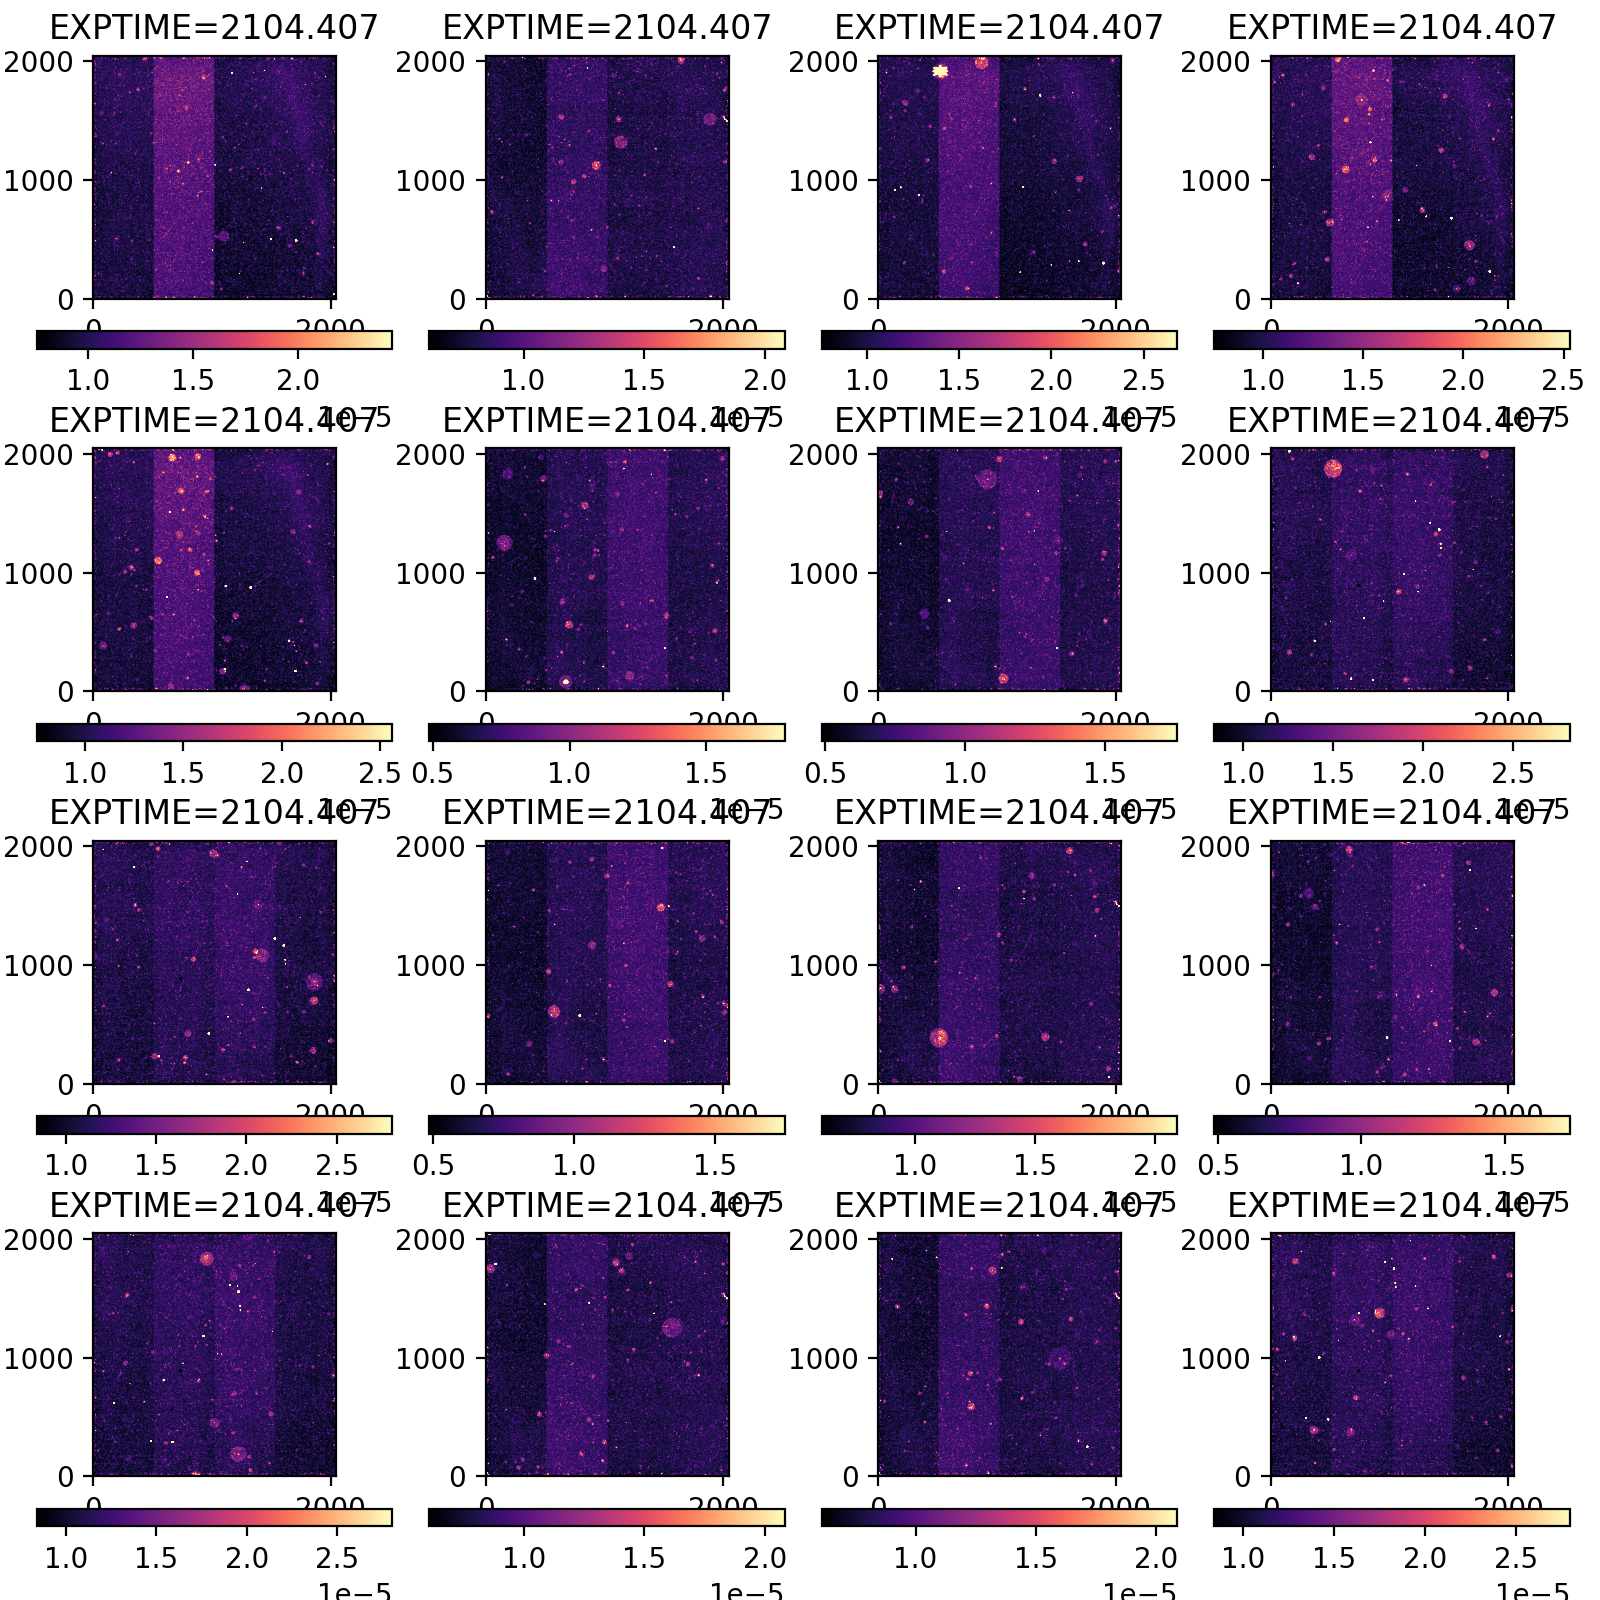

['/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F770W/stage2/jw02391005001_04101_00001_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F770W/stage2/jw02391005001_04101_00002_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F770W/stage2/jw02391005001_04101_00004_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F770W/stage2/jw02391005001_04101_00003_mirimage_fixed_wcs_skysub_cal.fits']
['/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F1000W/stage2/jw02391005001_06101_00003_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F1000W/stage2/jw02391005001_06101_00001_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23/F1000W/stage2/jw02391005001_06101_00004_mirimage_fixed_wcs_skysub_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23

In [38]:
inpath = '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/miri_nov23'
savepath = '/Users/etarantino/Documents/JWST_DATA_PAHS/pipeline/plots/'

filt_list = ['F560W', 'F770W', 'F1000W', 'F1130W', 'F1500W']

for filt in filt_list:
    cal_files = glob.glob(f'{inpath}/{filt}/stage2/*skysub_cal.fits')
    print(cal_files)

    fig = plt.figure(1,figsize=(8,8))
    plt.clf()
    fig_obj, ax_list = plt.subplots(2, 2, figsize=(12,12), num = 1)
    ax_list_flat = ax_list.flatten()

    vmin = 1e-8
    vmax = 5e-6

    for i, cal_file in enumerate(cal_files):
        model = dm.open(cal_file)

        exptime = model.meta.exposure.exposure_time

        varnoise = model.var_rnoise

        ax = ax_list_flat[i]

        vmin = np.nanpercentile(varnoise, 5)
        vmax = np.nanpercentile(varnoise, 99)

        im = ax.imshow(varnoise, origin = 'lower', vmin = vmin, vmax = vmax, cmap = 'magma')
        cb = plt.colorbar(im, ax=ax, location = 'bottom', pad = 0.1)

        ax.set_title('EXPTIME={}'.format(exptime))

        savename = f'{filt}_exposures_cal_readnoise.pdf'

    plt.savefig(savepath + savename,  bbox_inches='tight',pad_inches = 0.1)

In [35]:
np.nanpercentile(varnoise, 3)

6.774285333221996e-07

In [31]:
vmax

1.3604964635760535e-06

Now for the NIRCAM LW data 

In [40]:
inpath = '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23'
savepath = '/Users/etarantino/Documents/JWST_DATA_PAHS/pipeline/plots/'

filt_list = ['F300M', 'F335M', 'F360M']

for filt in filt_list:
    cal_files = glob.glob(f'{inpath}/{filt}/*nrcblong_cal.fits')
    print(cal_files)

    fig = plt.figure(1,figsize=(8,8))
    plt.clf()
    fig_obj, ax_list = plt.subplots(2, 2, figsize=(12,12), num = 1)
    ax_list_flat = ax_list.flatten()

    vmin = 1e-8
    vmax = 5e-6

    for i, cal_file in enumerate(cal_files):
        model = dm.open(cal_file)

        exptime = model.meta.exposure.exposure_time

        varnoise = model.var_rnoise

        ax = ax_list_flat[i]

        vmin = np.nanpercentile(varnoise, 5)
        vmax = np.nanpercentile(varnoise, 99)

        im = ax.imshow(varnoise, origin = 'lower', vmin = vmin, vmax = vmax, cmap = 'magma')
        cb = plt.colorbar(im, ax=ax, location = 'bottom', pad = 0.1)

        ax.set_title('EXPTIME={}'.format(exptime))

        savename = f'{filt}_exposures_cal_readnoise.pdf'

    plt.savefig(savepath + savename,  bbox_inches='tight',pad_inches = 0.1)

['/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F300M/jw02391007001_03101_00003_nrcblong_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F300M/jw02391007001_03101_00004_nrcblong_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F300M/jw02391007001_03101_00002_nrcblong_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F300M/jw02391007001_03101_00001_nrcblong_cal.fits']
['/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F335M/jw02391007001_07101_00002_nrcblong_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F335M/jw02391007001_07101_00003_nrcblong_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F335M/jw02391007001_07101_00004_nrcblong_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F335M/jw02391007001_07101_00001_nrcblong_cal.fits']
['/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F360M/jw02391007001_05101_00001_nrcblong_

Now for the NIRCAM SW data 

In [42]:
inpath = '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23'
savepath = '/Users/etarantino/Documents/JWST_DATA_PAHS/pipeline/plots/'

filt_list = ['F115W', 'F150W', 'F200W']

for filt in filt_list:
    cal_files = glob.glob(f'{inpath}/{filt}/*nrcb?_cal.fits')
    print(cal_files)

    fig = plt.figure(1,figsize=(8,8))
    plt.clf()
    fig_obj, ax_list = plt.subplots(4, 4, figsize=(20,20), num = 1)
    ax_list_flat = ax_list.flatten()

    vmin = 1e-8
    vmax = 5e-6

    for i, cal_file in enumerate(cal_files):
        model = dm.open(cal_file)

        exptime = model.meta.exposure.exposure_time

        varnoise = model.var_rnoise

        ax = ax_list_flat[i]

        vmin = np.nanpercentile(varnoise, 5)
        vmax = np.nanpercentile(varnoise, 99)

        im = ax.imshow(varnoise, origin = 'lower', vmin = vmin, vmax = vmax, cmap = 'magma')
        cb = plt.colorbar(im, ax=ax, location = 'bottom', pad = 0.1)

        ax.set_title('EXPTIME={}'.format(exptime))

        savename = f'{filt}_exposures_cal_readnoise.pdf'

    plt.tight_layout()
    plt.savefig(savepath + savename,  bbox_inches='tight',pad_inches = 0.1)

['/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00004_nrcb4_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00004_nrcb3_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00004_nrcb1_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00001_nrcb1_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00001_nrcb2_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00002_nrcb3_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00001_nrcb4_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00003_nrcb2_cal.fits', '/astro/dust_kg/etarantino/JWST_PAHS_2391/sexa/nircam_nov23/F115W/jw02391007001_05101_00001_nrcb3_cal.fits', '/astro/dust_kg/et